In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
data = pd.read_csv('cleaned_data.csv')
df = pd.DataFrame(data)

In [209]:
df['SuicideCount'].describe()

count    118560.000000
mean         63.383004
std         253.628818
min           0.000000
25%           0.000000
50%           4.000000
75%          32.000000
max        6787.000000
Name: SuicideCount, dtype: float64

In [210]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.head()

,index,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,EmploymentPopulationRatio
0,0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
1,4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
2,5,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,1.904762,3.276003,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
3,6,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,1.357466,2.487562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
4,7,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,2.094241,3.202562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315


In [211]:
df.head()

,index,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,EmploymentPopulationRatio
0,0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
1,4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
2,5,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,1.904762,3.276003,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
3,6,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,1.357466,2.487562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
4,7,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,2.094241,3.202562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315


In [212]:
df_yearly = df.groupby(by='Year')['SuicideCount'].count().reset_index(name="TotalSuicides")


In [213]:
df_yearly.head()

,Year,TotalSuicides
0,1990,3078
1,1991,2517
2,1992,2619
3,1993,2611
4,1994,2635


In [214]:
import ast
df_yearly['Year'] = df_yearly['Year'].apply(lambda x : str(x))

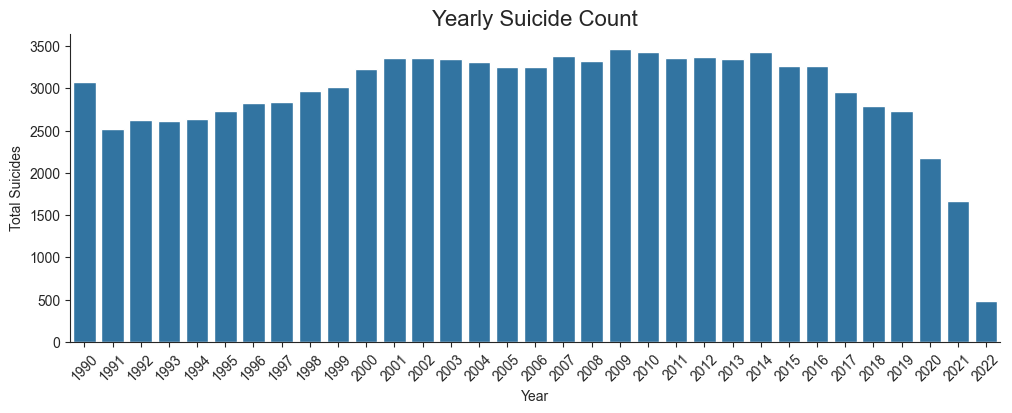

In [215]:

sns.set_style("ticks")  # Options: "darkgrid", "whitegrid", "dark", "white", "ticks"

plt.figure(figsize=(12,4))


sns.barplot(x=df_yearly['Year'], y=df_yearly["TotalSuicides"]) 

plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.title("Yearly Suicide Count", fontsize=16)

plt.xticks(rotation=45)

sns.despine()
plt.show()


In [216]:
df_age_group = df.groupby(by='AgeGroup')['SuicideCount'].count().reset_index(name="TotalSuicides")
df_age_group.drop(index=6, inplace=True)


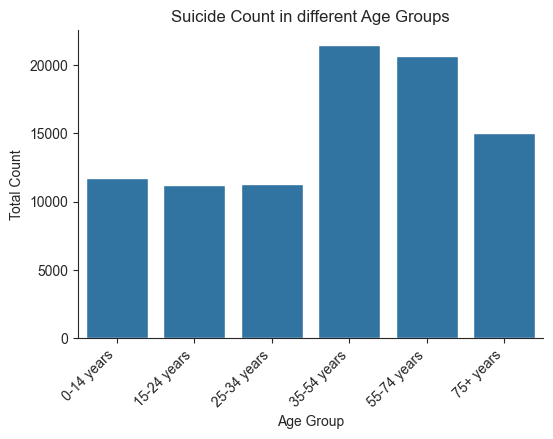

In [217]:
sns.set_style('ticks')
plt.figure(figsize=(6,4))
sns.barplot(x=df_age_group['AgeGroup'], y=df_age_group['TotalSuicides'])

plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.title('Suicide Count in different Age Groups')
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.show()

Gender-wise comparision

In [218]:
df_gender = df.groupby('Sex')['DeathRatePer100K'].count().to_frame(name="TotalCounts").reset_index()
df_gender 

,Sex,TotalCounts
0,Female,46898
1,Male,49454
2,Unknown,987


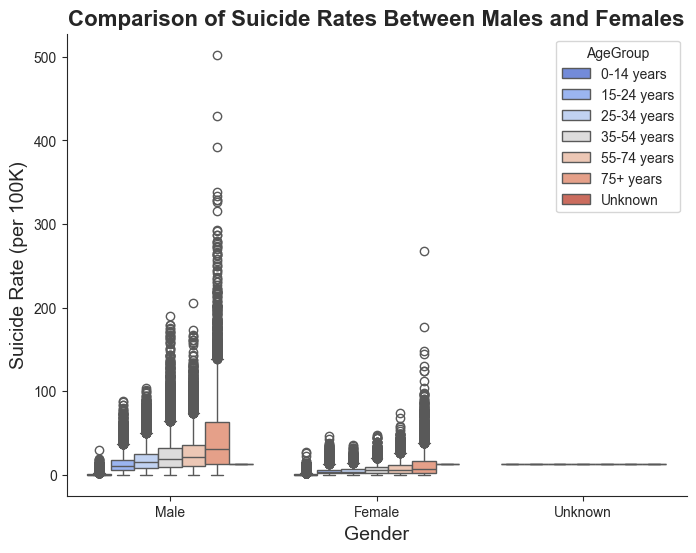

In [219]:
plt.figure(figsize=(8,6))

sns.boxplot(x="Sex", y="DeathRatePer100K", hue="AgeGroup", data=df, palette="coolwarm")

# Labels and title
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Suicide Rate (per 100K)", fontsize=14)
plt.title("Comparison of Suicide Rates Between Males and Females", fontsize=16, fontweight='bold')

sns.despine()
plt.show()

Suicide Rate of different countries over time

In [220]:
top_5 = df.groupby('CountryName')['DeathRatePer100K'].mean().nlargest(5).index


In [221]:
df_pivot = df[df['CountryName'].isin(top_5)].pivot_table(index="Year", columns="CountryName", values="DeathRatePer100K")
df_pivot

CountryName,Belarus,Hungary,Latvia,Lithuania,Russian Federation
Year,,,,,
1990,23.157474,53.296208,32.733936,29.452471,33.128823
1991,27.885147,55.280522,40.004685,36.779241,34.481283
1992,28.146885,54.427896,43.631999,42.134591,37.577390
1993,34.065626,50.922185,52.825063,50.613567,44.482779
1994,36.296643,50.291293,49.561972,55.324166,48.118145
1995,36.861988,48.751209,50.464973,56.429211,46.250679
1996,41.557811,46.750910,46.848540,55.420900,44.320595
1997,41.033977,46.411109,45.547118,52.503734,42.776910
1998,42.558990,44.029710,40.708766,53.103633,40.208914


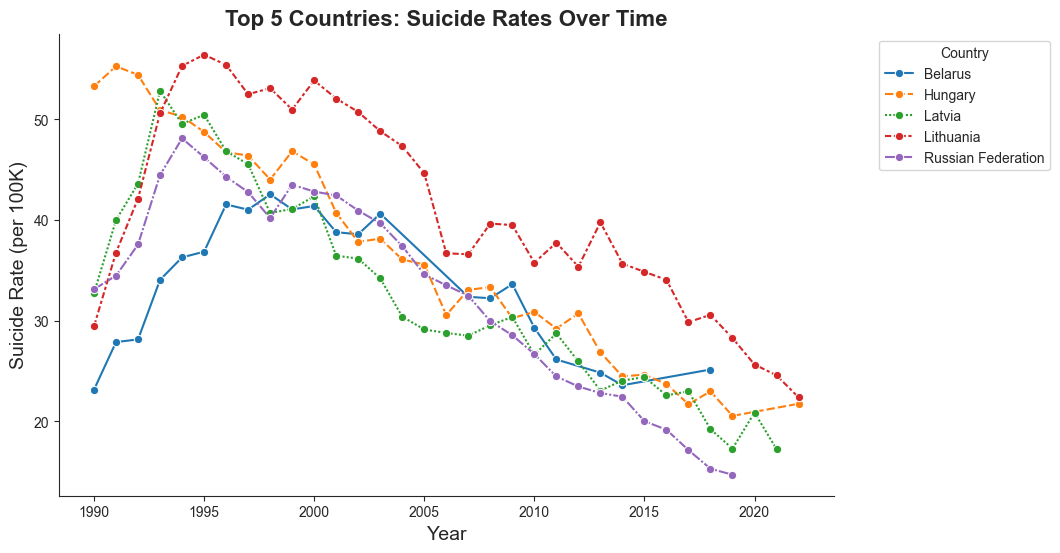

In [222]:
# Select the top 5 countries with highest average suicide rate
plt.figure(figsize=(10,6))
sns.lineplot(data=df_pivot, marker="o")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Suicide Rate (per 100K)", fontsize=14)
plt.title("Top 5 Countries: Suicide Rates Over Time", fontsize=16, fontweight='bold')

plt.xticks()
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.show()


Suicide rates across different regions over years.

In [223]:
df.head()

,index,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,EmploymentPopulationRatio
0,0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
1,4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
2,5,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,1.904762,3.276003,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
3,6,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,1.357466,2.487562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315
4,7,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,2.094241,3.202562,3247039.0,652174990.8,200.85222,906184212.3,1740.0,45.315


In [224]:
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
import plotly.express as px

df_map = df.groupby("CountryName")["DeathRatePer100K"].mean().reset_index()

fig = px.choropleth(
    df_map, 
    locations="CountryName",
    locationmode="country names",
    color="DeathRatePer100K",
    hover_name="CountryName",
    color_continuous_scale="Reds",
    title="Global Suicide Rates (per 100K)"
)


fig.update_layout(
    width=700,  
    height=400   
)

fig.show()


In [ ]:
import plotly.express as px

# Aggregate suicide rates by country
df_geo = df.groupby("CountryName").agg({"DeathRatePer100K": "mean"}).reset_index()

# Create the scatter geo plot
fig = px.scatter_geo(
    df_geo,
    locations="CountryName",
    locationmode="country names",
    size="DeathRatePer100K",
    hover_name="CountryName",
    color="DeathRatePer100K",
    projection="orthographic",  # Different projections: 'equirectangular', 'orthographic', 'mercator'
    title="Global Suicide Rates (per 100K)",
    color_continuous_scale="reds"
)

fig.update_traces(marker=dict(sizemode="area", sizeref=1))

fig.update_layout(
    width=900,  # Set the width
    height=500   # Set the height
)
# Show the plot
fig.show()


c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\kunal\OneDrive\Desktop\practice\.venv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable 

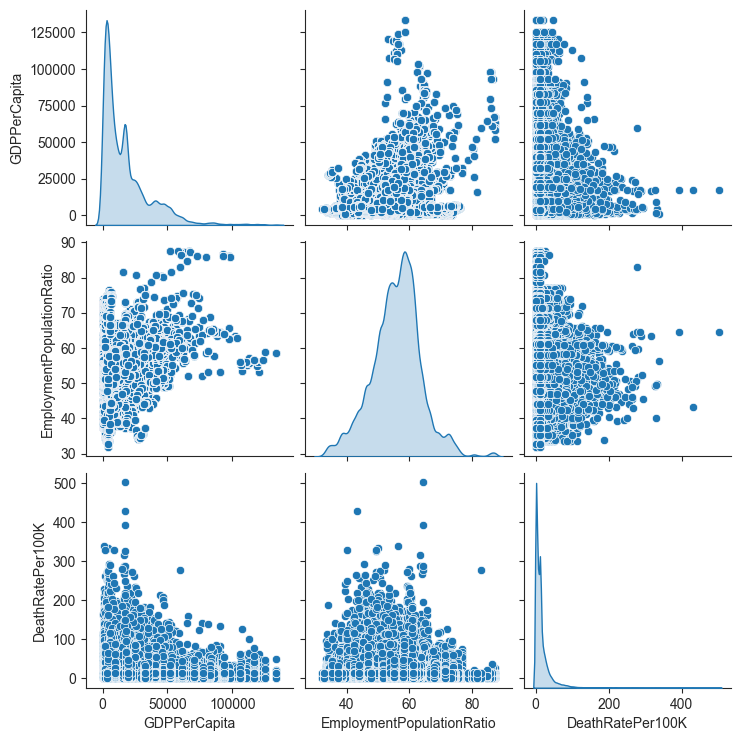

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features for correlation analysis
selected_features = ["GDPPerCapita", "EmploymentPopulationRatio", "DeathRatePer100K"]

# Create a pairplot to visualize relationships
sns.pairplot(df[selected_features], diag_kind="kde", palette="coolwarm")
plt.show()
